In [1]:
import numpy as np
import re
import pandas as pd
import requests
import random
import glob
from matplotlib import pyplot as plt

In [2]:
from skimage.color import rgb2gray
from skimage.io import imshow,imread 


In [3]:
alpha = [('A', 'a'), ('B', 'b'), ('C', 'c'), ('R', 'r'),('Y', 'y'),('space', '/s') ]

In [4]:
X_train = []
y_train = []

X_test = []
y_test = []

In [5]:
# url = "C:/Users/m_mas/Desktop/ellehacks/asl_alphabet_test/asl_alphabet_test"
# files = glob.glob(url+"A_test")

In [6]:
# dir_ = "C:/Users/m_mas/Desktop/ellehacks/asl_alphabet_test/asl_alphabet_test/"
# img = imread(dir_ + 'A_test.JPG')
# grayscale = rgb2gray(img)
def gray(type_, X_list,y_list, alpha):
    for path_name, y_label in alpha:
        dir_ = "C:/Users/m_mas/Desktop/ellehacks/asl_alphabet_" +type_+"/asl_alphabet_"+ type_+ "/"
        img = imread(dir_ + path_name + "_" + type_ + '.JPG')
#         try:
        img = rgb2gray(img)
        X_list.append(img)
        y_list.append(y_label)
#         except:
#                 pass

    return(X_list, y_list)

In [7]:
# Changing testing images to grayscale
X_list, y_list = gray(type_ = 'test', X_list = X_test, y_list = y_test, alpha = alpha)

In [8]:
X_test = np.array(X_list)
y_test = np.array(y_test)

6
6
y


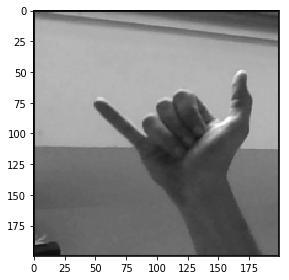

In [9]:
# checking the testing images
print(len(X_test))
print(len(y_test))
print(y_test[4])
imshow(X_test[4])

In [10]:
print(X_test.shape)
print(X_test[3].shape)
print(y_test.shape)

(6, 200, 200)
(200, 200)
(6,)


In [11]:
def gray2(type_, X_list,y_list, alpha):
    for path_name, y_label in alpha:
        counter = 1
        dir_ = "C:/Users/m_mas/Desktop/ellehacks/asl_alphabet_" +type_+"/asl_alphabet_"+ type_+ "/"+ path_name + "/"
#         img = imread(dir_ + path_name + "_" + type_ + '.JPG')
        files = glob.glob(dir_+"*")

        for file in files:
            try:
                img = imread(file)
                img = rgb2gray(img)
                X_list.append(img)
                y_list.append(y_label)
            except:
                pass
    return(X_list, y_list)

In [12]:
# imshow(X_train[400])
# Changing testing images to grayscale
X_list, y_list = gray2(type_ = 'train', X_list = X_train, y_list = y_train, alpha = alpha)


In [13]:
X_train = np.array(X_list)
y_train = np.array(y_list)

(6, 200, 200)
(200, 200)
(6,)
r


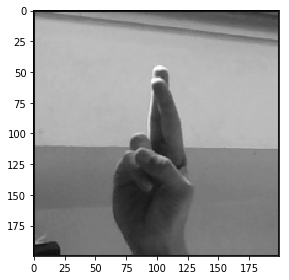

In [14]:
print(X_test.shape)
print(X_test[5].shape)
print(y_test.shape)
num = 11999
print(y_train[num])
imshow(X_train[num])

In [15]:
# checking the testing images
len(np.unique(y_train))

6

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
Z_train = X_train.reshape(X_train.shape[0], 200*200)
Z_test = X_test.reshape(X_test.shape[0], 200*200)

In [18]:
scaler = MinMaxScaler()
Z_train = scaler.fit_transform(Z_train)
Z_test = scaler.transform(Z_test)

In [19]:
# Make sure each value is a float. (Otherwise, we get an error.)
Z_train = X_train.astype('float32')
Z_test = X_test.astype('float32')

In [20]:
print(Z_train.shape)
print(Z_test.shape)

(18000, 200, 200)
(6, 200, 200)


In [21]:
# Reshape each image to be 28 x 28 x 1.
Z_train = Z_train.reshape(Z_train.shape[0], 200, 200, 1)
Z_test = Z_test.reshape(Z_test.shape[0], 200, 200, 1)

In [22]:
Z_train[0].shape

(200, 200, 1)

In [28]:
np.unique(y_train)

array(['/s', 'a', 'b', 'c', 'r', 'y'], dtype='<U2')

In [29]:
y__train = y_train
y__test = y_test

In [31]:
np.unique(y__train)

array(['/s', 'a', 'b', 'c', 'r', 'y'], dtype='<U2')

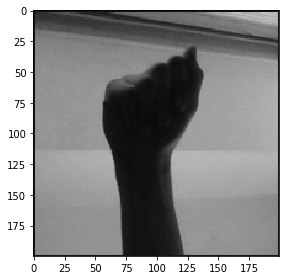

In [32]:
imshow(X_train[0])

In [33]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y__train = lb.fit_transform(y__train)
y__test = lb.transform(y__test)

In [37]:
# lb.inverse_transform(y_train[3])
y__train[1500]

array([0, 1, 0, 0, 0, 0])

In [39]:
lb.inverse_transform(y__train[[1500]])

array(['a'], dtype='<U2')

In [41]:
X_train[0].shape

(200, 200)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
check = imshow(X_train[3])
check

In [43]:
#Instantiate Model

cnn_model = Sequential()

# Add a convolutional layer
cnn_model.add(Conv2D(filters = 6,
                     kernel_size = 3,
                     activation = "relu",
                    input_shape=(200,200,1)))

# Add a pooling layer
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# Add a second convolutional layer
cnn_model.add(Conv2D(kernel_size = 3,
                     filters = 16,
                     activation = "relu"))

# Add a second pooling layer
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# Add a third convolutional layer
cnn_model.add(Conv2D(kernel_size = 3,
                     filters = 26,
                     activation = "relu"))

# Add a third pooling layer
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# Add a third convolutional layer
cnn_model.add(Conv2D(kernel_size = 3,
                     filters = 36,
                     activation = "relu"))

# Add a third pooling layer
cnn_model.add(MaxPooling2D(pool_size = (3,3)))

# Flatten the 3D array to 1D array
cnn_model.add(Flatten())

# Add in first perceptrons
cnn_model.add(Dense(128, activation = "relu"))

# Add in a Dropout
cnn_model.add(Dropout(0.5))

# Add in second perceptrons
cnn_model.add(Dense(64, activation = "relu"))

# Add in a second Dropout
cnn_model.add(Dropout(0.5))

# Output
cnn_model.add(Dense(6, activation = "softmax"))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 6)       60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 26)        3770      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 26)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 36)          8

In [44]:
cnn_model.compile(loss='categorical_crossentropy',
                 optimizer = 'adam',
                 metrics=['accuracy'])

In [45]:
history = cnn_model.fit(Z_train,
                       y__train,
                       batch_size=150,
                       validation_data = (Z_test, y__test),
                       epochs = 10,
                       verbose = 1)

W0201 16:57:50.385456 13212 deprecation.py:323] From C:\Users\m_mas\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 18000 samples, validate on 6 samples
Epoch 1/10
18000/18000 [==============================] - 220s 12ms/sample - loss: 1.6014 - accuracy: 0.3123 - val_loss: 0.6320 - val_accuracy: 0.8333
Epoch 2/10
18000/18000 [==============================] - 197s 11ms/sample - loss: 0.7762 - accuracy: 0.6863 - val_loss: 0.0643 - val_accuracy: 1.0000
Epoch 3/10
18000/18000 [==============================] - 205s 11ms/sample - loss: 0.4378 - accuracy: 0.8311 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 4/10
18000/18000 [==============================] - 192s 11ms/sample - loss: 0.2778 - accuracy: 0.8998 - val_loss: 3.2368e-04 - val_accuracy: 1.0000
Epoch 5/10
18000/18000 [==============================] - 197s 11ms/sample - loss: 0.2006 - accuracy: 0.9272 - val_loss: 6.4250e-05 - val_accuracy: 1.0000
Epoch 6/10
18000/18000 [==============================] - 194s 11ms/sample - loss: 0.1506 - accuracy: 0.9466 - val_loss: 1.0997e-05 - val_accuracy: 1.0000
Epoch 7/10
18000/18000 [============